In [1]:
from base import *
from base import Init

from functions import *

from task1 import task1
from task2 import task2
from task3 import task3
from task4 import task4
from task5 import task5

g_Tones, g_Midif, g_Fs, g_BigN = Init()
g_MyTones = [36, 44, 103]

functions_set_tones(g_Tones)

In [2]:
#task1(g_Tones, g_MyTones, g_Fs, g_BigN)

In [3]:
#task2(g_Fs, g_BigN)

In [4]:
#task3(g_Tones, 200, 10, g_Fs, g_BigN)

100 61.73881879250957 69.2994810020415 3 200
65.41 65.34818014881878
100 123.47763758501914 138.598962004083 7 200
130.82 130.6203737427679
100 185.21645637752871 207.8984430061245 11 200
196.23 196.15852027876085
100 246.95527517003828 277.197924008166 15 200
261.64 261.6966668147538
100 308.6940939625478 346.4974050102075 19 200
327.04999999999995 327.3107999056164


(array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]))

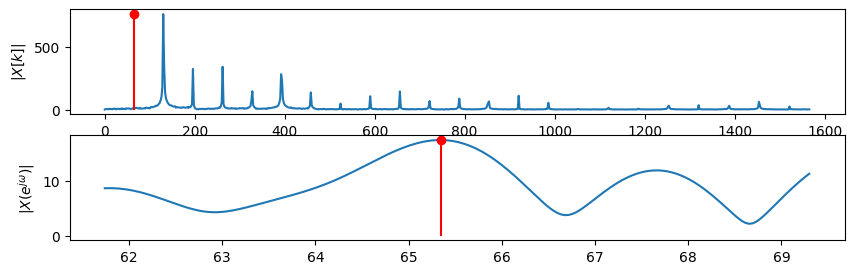

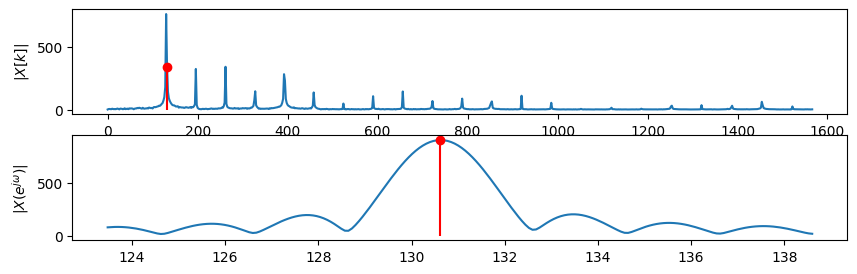

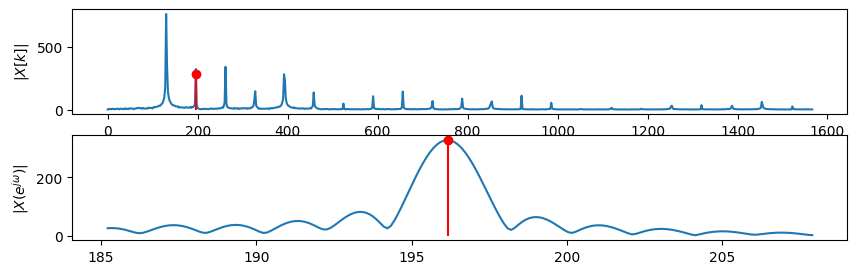

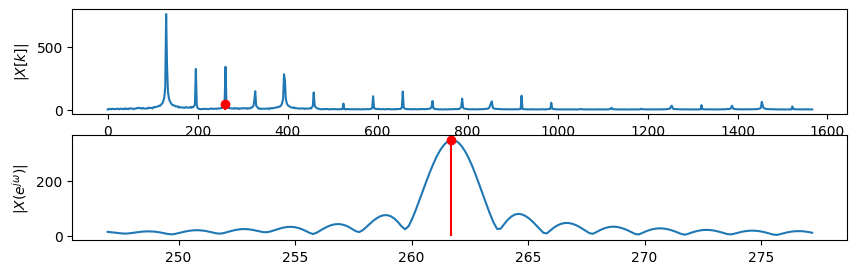

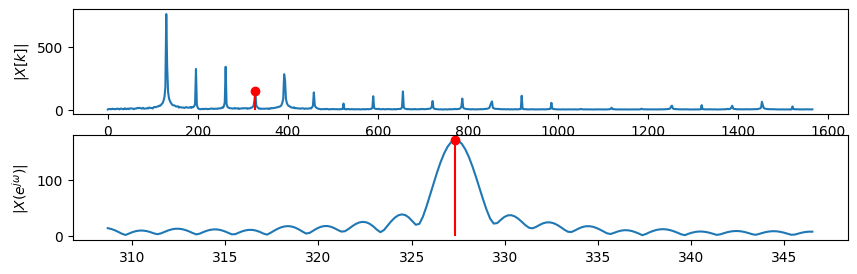

In [5]:
#task4(g_Tones, g_Midif, g_MyTones, 200, 10, g_Fs, g_BigN)

DTFT_cent_mult(g_Tones[36], 65.41, 200, 5, g_Fs, g_BigN)
#mag, phase = DFT(g_Tones[36])
#plot_tone_rfft_raw(36, g_Fs, g_BigN)

In [6]:
#task5(g_Tones, g_Midif, g_MyTones, 2, 200, 10, g_Fs, g_BigN)